## Линейная регрессия

In [129]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/MelnikDM/LR_Life_Expectancy/main/Life%20Expectancy%20Data.csv'
df_l = pd.read_csv(url, sep = ',')
df_l.tail(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


## Exploratory data analysis

Проведем разведочный анализ нашего датасета по следующим пунктам:

0.0. Общее исследование датасета;
 1.0. Очистка данных от NaN;
 1.1. Работа с некорректными данными;
 1.2. Посмотрим основные типы данных;
 1.2. Посмотрим количество пингвинов по виду;
 1.3. Посмотрим количество пингвинов по полу;
 1.4. Посмотрим распределение пингвинов по территории;
 1.5. Посмотрим распределение пингвинов по характеристикам.

#### Общее исследование датасета

Изучим наш датасет, на предмет поиска в нем: 

- основных типов данных;
- отсутствующих данных;
- нетипичных данных или выбросов;
- дубликатов;
- некорректных данных (представленных в разных форматах).

Уже в процессе исследования данных мы выяснили, что ряд наших столбцов имеет в заголовках лишние пробелы. Заменим их на '_'.

In [31]:
df_l.columns = df_l.columns.str.replace(' ','_')

In [32]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy_                 2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles_                         2938 non-null   int64  
 10  _BMI_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   int64  
 12  Polio               

In [4]:
df_l.shape

(2938, 22)

In [5]:
print(df_l.Country.nunique(), "- страны в DF")
print(df_l.Status.nunique(), " - типа статусов")

193 - страны в DF
2  - типа статусов


Как мы видим, в датасете находится **2938 записей**. Данные в основном количественные (20 столбцов из 22х). Встречаются 2 столбца с номинативными данными - это название страны и ее статус. Большая часть количественных столбцов является вещественными, что косвенно говорит о наличии в них пропусков.

Попробуем оценить количество пропущенных данных.

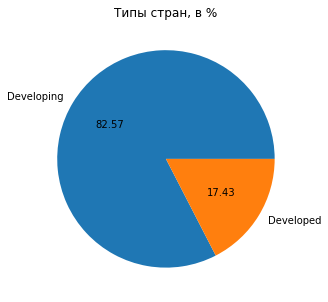

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot()
df_l.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Типы стран, в %')

plt.show()

In [5]:
def NaN_dataplot(df:pd.DataFrame):
    ''' Данная функция:
        - подсчитывает количество NaN по столбцам
        - подсчитывает общее количество NaN по столбцам в %
        - подсчитывает количество NaN по строкам
        - строит 2 графика с NaN по столбцам и строкам'''
    total= df.size # общее количество записей
    NaNCount = df.isnull().sum() # количество NaN по столбцам
    NaNtotal = NaNCount.sum() # общее количество NaN
    print("DF содержит", round(((NaNtotal/total) * 100), 2), "%", "пропущенных значений")
    print()

    missing = NaNCount[NaNCount > 0] 
    missing.sort_values(inplace=True) 
    print(missing)
    print()
    print('Пропущенно по строкам')
    print()
    rowNaN = df.isnull().sum(axis=1).value_counts()
    print(rowNaN)
    
#     # Графики для наглядности
#     matplotlib.style.use('tableau-colorblind10')
#     fig, axes = plt.subplots(figsize=(8, 5))
#     missing.plot.barh()
#     plt.title(title, size=10)
#     plt.xticks(fontsize=8)
#     plt.yticks(fontsize=8)
#     plt.xlabel(xlabel, fontsize=8)
#     plt.ylabel(ylabel, fontsize=8)
#     plt.show()
    
#     fig, axes = plt.subplots(figsize=(10, 5))
#     rowNaN.plot.barh()
#     plt.title(title, size=10)
#     plt.xticks(fontsize=8)
#     plt.yticks(fontsize=8)
#     plt.xlabel('Количество строк с NaN', fontsize=8)
#     plt.ylabel('Количество NaN в строке', fontsize=8)
#     plt.show()

In [12]:
NaN_dataplot(df_l)

DF содержит 3.97 % пропущенных значений

Life expectancy                     10
Adult Mortality                     10
Polio                               19
Diphtheria                          19
 BMI                                34
 thinness  1-19 years               34
 thinness 5-9 years                 34
Schooling                          163
Income composition of resources    167
Alcohol                            194
Total expenditure                  226
GDP                                448
Hepatitis B                        553
Population                         652
dtype: int64

Пропущенно по строкам

0    1649
1     657
2     360
4     122
3      64
5      45
6      28
9       9
8       4
dtype: int64


Несмотря на небольшой процент общих потерь (всего 3,97%) целый ряд столбцов содержит от **15 до 20% пропусков**. В частности, речь идет о Населении, Гепатите Б, ВВП, Затратах на здравоохранение.

В принципе, ряд этих данных можно найти в открытом доступе (например, "Население" и "ВВП"). Либо можно поступить проще и использовать стандартные методы такие, как:

- Замена NaN на 0.
- Замена NaN на средние значения или медиану (с группировкой по стране).
- Замена NaN на средние значения или медиану, используя функцию SimpleImputer().
- Замена NaN с использованием метода ffil/bffil.
- Замена NaN с использованием функции KNNImputer().
- Замена NaN при помощи интерполяции. 

Каких-либо общих решений относительно того, что делать с пропущенными данными, не существует. **Каждый датасет необходимо рассматривать отдельно**.

Важная информация содержится в графике с данными о количестве NaN в строках. Т.е., так мы можем определить по какой стране у нас меньше всего данных. Судя по полученным данным, у нас есть 45 строк, где пропущено 5 переменных из 20, 28 - 6, 9-9 и 4 - 8. Возможно, имеет смысл более внимательно посмотреть на эти строки. Т.к., вероятно, их будет проще удалить, чем работать с ними.

<AxesSubplot:>

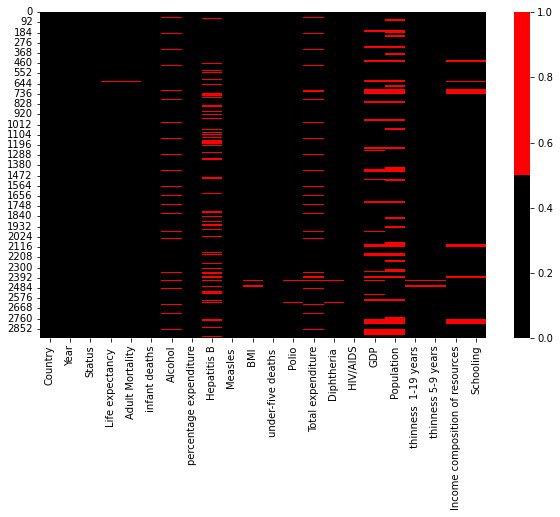

In [7]:
fg, axes = plt.subplots(figsize=(10, 6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
colours = ['#000000', '#ff0000'] 
sns.heatmap(df_l.isnull(), cmap=sns.color_palette(colours))

Тепловая карта пропущенных значений позволяет наглядно определить, где больше всего NaN. К сожалению, она хорошо работает только на маленьких датасетах. 

#### Корреляционная таблица

Построим корреляционную таблицу для того, чтобы изучить тесноту и направление взаимосвязи некоторых наших переменных. Это позволит нам понять, какие пременные сильнее всего связаны с **Life expectancy**. 

Для начала обозначим "силу" взаимосвязей:

- 0.1 - 0.3 - Слабая взаимосвязь
- 0.3 - 0.5 - Умеренная взаимосвязь
- 0.5 - 0.7 - Заметная взаимосвязь
- 0.7 - 0.9 - Высокая взаимосвязь
- 0.9 - 1 - Весьма высокая взаимосвязь

<AxesSubplot:>

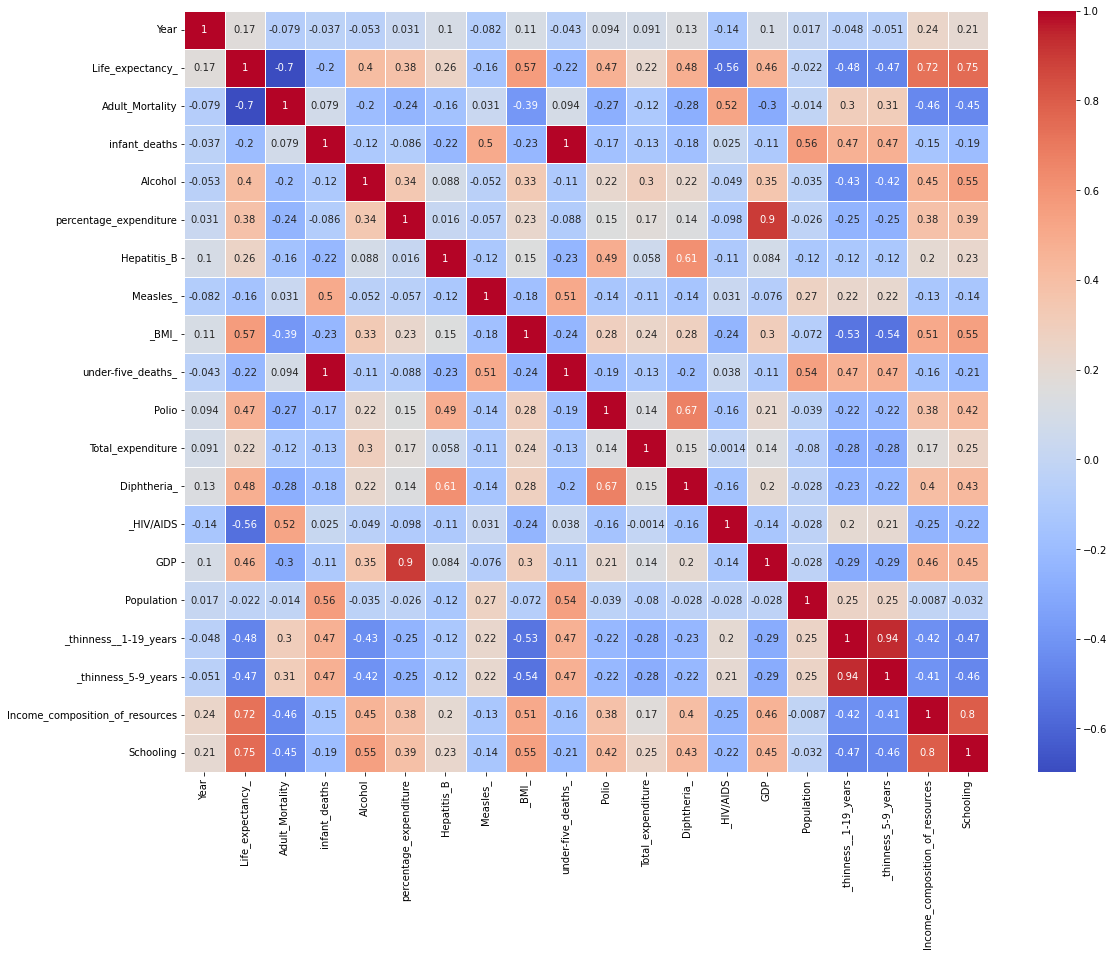

In [33]:
fg, axes = plt.subplots(figsize=(18, 14))
sns.heatmap(df_l.corr(), cmap="coolwarm", annot = True, axes = axes, annot_kws={"fontsize":10}, lw = 0.5 )

Ожидаемая продолжительность имеет **высокую положительную взаимосвязь** с продолжительностью обучения и доходом. **Высокая отрицательная корреляция** наблюдается со взрослой смертностью (вероятность смерти в возрасте 15-60 лет на 1000 населения). 

**Заметная взаимосвязь**:
- Индекс массы тела *(положительная)*
- ВИЧ/СПИД *(отрицательная)*

**Умеренная взаимосвязь**:
- Худоба среди детей от 5 до 9 лет *(отрицательная)*
- Худоба среди детей от 10 до 19 лет *(отрицательная)* 
- Алкоголь *(положительная)*
- Расходы на здравоохранение в процентах от ВВП *(положительная)*
- Полиомиелит *(положительная)*
- Дифтерия *(положительная)*
- ВВП *(положительная)*

Заметная взаимосвязь наблюдается у дифтерии и полиомиелита с геппатитом Б (+0.26 с продолжительностью жизни).

Важно отметить, что ряд признаков, которые не имеют практически никакого влияния на продолжительность жизни, могут затрагивать ее опосредовано. Например, население (-0.022) связано с детской смертностью (-0.2), которая в свою очередь связана с худобой, у которой коэффициент корреляции с продолжительностью жизни приближается к заметным значениям (-0.48).

#### Замена 0 на NaN

В процессе исследования данных мы заметили, что в нашем наборе данных довольно **много признаков со значением "0"**. Мы хотим заменить их на NaN, чтобы в дальнейшем заполнить их тем или иным методом. Прежде чем поменять нули на NaN, мы сравним, как подобная замена повлияет на силу взаимосвязи между Life_expectancy и другими признаками. 

In [131]:
df_l2 = pd.read_csv(url, sep = ',', na_values = '0')
df_l2.columns = df_l2.columns.str.replace(' ','_')

In [132]:
corr_2 = df_l2[df_l2.columns[3:]].corr()['Life_expectancy_']
b = corr_2.to_frame().reset_index()
b.head(20)

,index,Life_expectancy_
0,Life_expectancy_,1.000000
1,Adult_Mortality,-0.696359
2,infant_deaths,-0.151548
3,Alcohol,0.404877
4,percentage_expenditure,0.427902
5,Hepatitis_B,0.256762
6,Measles_,-0.147950
7,_BMI_,0.567694
8,under-five_deaths_,-0.185136
9,Polio,0.465556


In [94]:
corr_1 = df_l[df_l.columns[3:]].corr()['Life_expectancy_']
a = corr_1.to_frame().reset_index()
a.head(20)

,index,Life_expectancy_
0,Life_expectancy_,1.000000
1,Adult_Mortality,-0.696359
2,infant_deaths,-0.196557
3,Alcohol,0.404877
4,percentage_expenditure,0.381864
5,Hepatitis_B,0.256762
6,Measles_,-0.157586
7,_BMI_,0.567694
8,under-five_deaths_,-0.222529
9,Polio,0.465556


In [102]:
df_mbm = a.merge(b, on = 'index', how = 'left').dropna(axis=0)
df_mbm['Diff, %'] = 100-(df_mbm['Life_expectancy__x'].div(df_mbm['Life_expectancy__y']))*100
df_mbm.head(10)

,index,Life_expectancy__x,Life_expectancy__y,"Diff, %"
0,Life_expectancy_,1.000000,1.000000,0.000000
1,Adult_Mortality,-0.696359,-0.696359,0.000000
2,infant_deaths,-0.196557,-0.151548,-29.699885
3,Alcohol,0.404877,0.404877,0.000000
4,percentage_expenditure,0.381864,0.427902,10.759040
5,Hepatitis_B,0.256762,0.256762,0.000000
6,Measles_,-0.157586,-0.147950,-6.513192
7,_BMI_,0.567694,0.567694,0.000000
8,under-five_deaths_,-0.222529,-0.185136,-20.197679
9,Polio,0.465556,0.465556,0.000000


Как видим, в процентном отношении разница в тесноте связей несущественная. Выделяются только **under-five_deaths и infant_deaths**, но они имеют слабую взаимосвять с продолжительностью жизни. При замене нулей эта связь уменьшается еще сильнее (на -21% и -30%).

Поэтому будем работать с датафреймом, в котором мы заменили нули на NaN.

In [56]:
NaN_dataplot(df_l2)

DF содержит 9.2 % пропущенных значений

Life_expectancy_                    10
Adult_Mortality                     10
Diphtheria_                         19
Polio                               19
_thinness_5-9_years                 34
_thinness__1-19_years               34
_BMI_                               34
Schooling                          191
Alcohol                            194
Total_expenditure                  226
Income_composition_of_resources    297
GDP                                448
Hepatitis_B                        553
percentage_expenditure             611
Population                         652
under-five_deaths_                 785
infant_deaths                      848
Measles_                           983
dtype: int64

Пропущенно по строкам

0     911
1     626
3     566
2     268
4     188
5     143
6     137
7      59
8      24
13      9
12      4
10      2
9       1
dtype: int64


#### Замена отсутствующих данных

Просмотрим строки, где пропусков больше 9.

In [42]:
df_l2[df_l2.isna().sum(axis=1) >= 9] # Просмотр строк с фильтрацией по NaN

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,NaN,0.01,NaN,98.0,NaN,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
689,Czechia,2015,Developed,78.8,86.0,NaN,NaN,NaN,97.0,9.0,...,97.0,NaN,97.0,0.1,NaN,NaN,1.8,1.8,NaN,NaN
1715,Monaco,2013,Developing,NaN,NaN,NaN,0.01,NaN,99.0,NaN,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1909,Niue,2013,Developing,NaN,NaN,NaN,0.01,NaN,99.0,NaN,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
2216,San Marino,2013,Developing,NaN,NaN,NaN,0.01,NaN,69.0,NaN,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2414,South Sudan,2010,Developing,55.0,359.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,NaN,NaN
2415,South Sudan,2009,Developing,54.3,369.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,NaN,NaN
2416,South Sudan,2008,Developing,53.6,377.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,NaN,NaN
2417,South Sudan,2007,Developing,53.1,381.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,NaN,NaN
2418,South Sudan,2006,Developing,52.5,383.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.1,NaN,8468152.0,NaN,NaN,NaN,NaN


In [43]:
df_l2.query('Country == "Monaco" |\
            Country == "San Marino" |\
            Country == "South Sudan" |\
            Country == "Niue" |\
            Country == "Cook Islands"').T

,624,1715,1909,2216,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424
Country,Cook Islands,Monaco,Niue,San Marino,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan,South Sudan
Year,2013,2013,2013,2013,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Status,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing
Life_expectancy_,NaN,NaN,NaN,NaN,57.3,56.6,56.4,56.0,55.4,55.0,54.3,53.6,53.1,52.5,51.9,51.4,58.0,52.0,49.6,48.9
Adult_Mortality,NaN,NaN,NaN,NaN,332.0,343.0,345.0,347.0,355.0,359.0,369.0,377.0,381.0,383.0,383.0,383.0,383.0,382.0,381.0,38.0
infant_deaths,NaN,NaN,NaN,NaN,26.0,26.0,26.0,26.0,27.0,27.0,27.0,27.0,27.0,28.0,28.0,29.0,29.0,30.0,30.0,31.0
Alcohol,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percentage_expenditure,NaN,NaN,NaN,NaN,NaN,46.074469,47.44453,38.338232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatitis_B,98.0,99.0,99.0,69.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Measles_,NaN,NaN,NaN,NaN,878.0,441.0,525.0,1952.0,1256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Южный Судан, Монако, Ниуэ, Острова Кука и Сан Марино предлагаются к удалению, так как большая часть признаков, имеющих хотя бы умеренное влияние на продолжительность жизни отсутствует. Южный Судан в виду отсутствия каких-либо данных и невозможности адекватной "работы" с пропусками. Сан Марино и Монако, в принципе, можно было бы оставить, внеся необходимые данные из открытых источников, но по причине нечеловеческой лени проще их удалить.

In [103]:
df_l2.drop(df_l2[(df_l2.Country == 'South Sudan') | (df_l2.Country == 'Monaco') | (df_l2.Country == 'San Marino') | (df_l2.Country == 'Cook Islands') | (df_l2.Country == 'Niue')]\
             .index, inplace=True)

In [104]:
df_l2.dropna(how = 'any', subset = ['Life_expectancy_'], inplace=True)

В процессе изучения данных мы также обратили внимание на некорректные значения по целому ряду столбцов. Например, у Алжира по признаку "Adult Mortality" присутствуют неадекватные данные: 2002 - 145, 2003 - 146, **2004 - 14**, 2012 - 113, 2013 - 112, **2014 - 11**. Видимо, при заполнении таблицы были сделаны опечатки.

Попытаемся решить данную проблему.

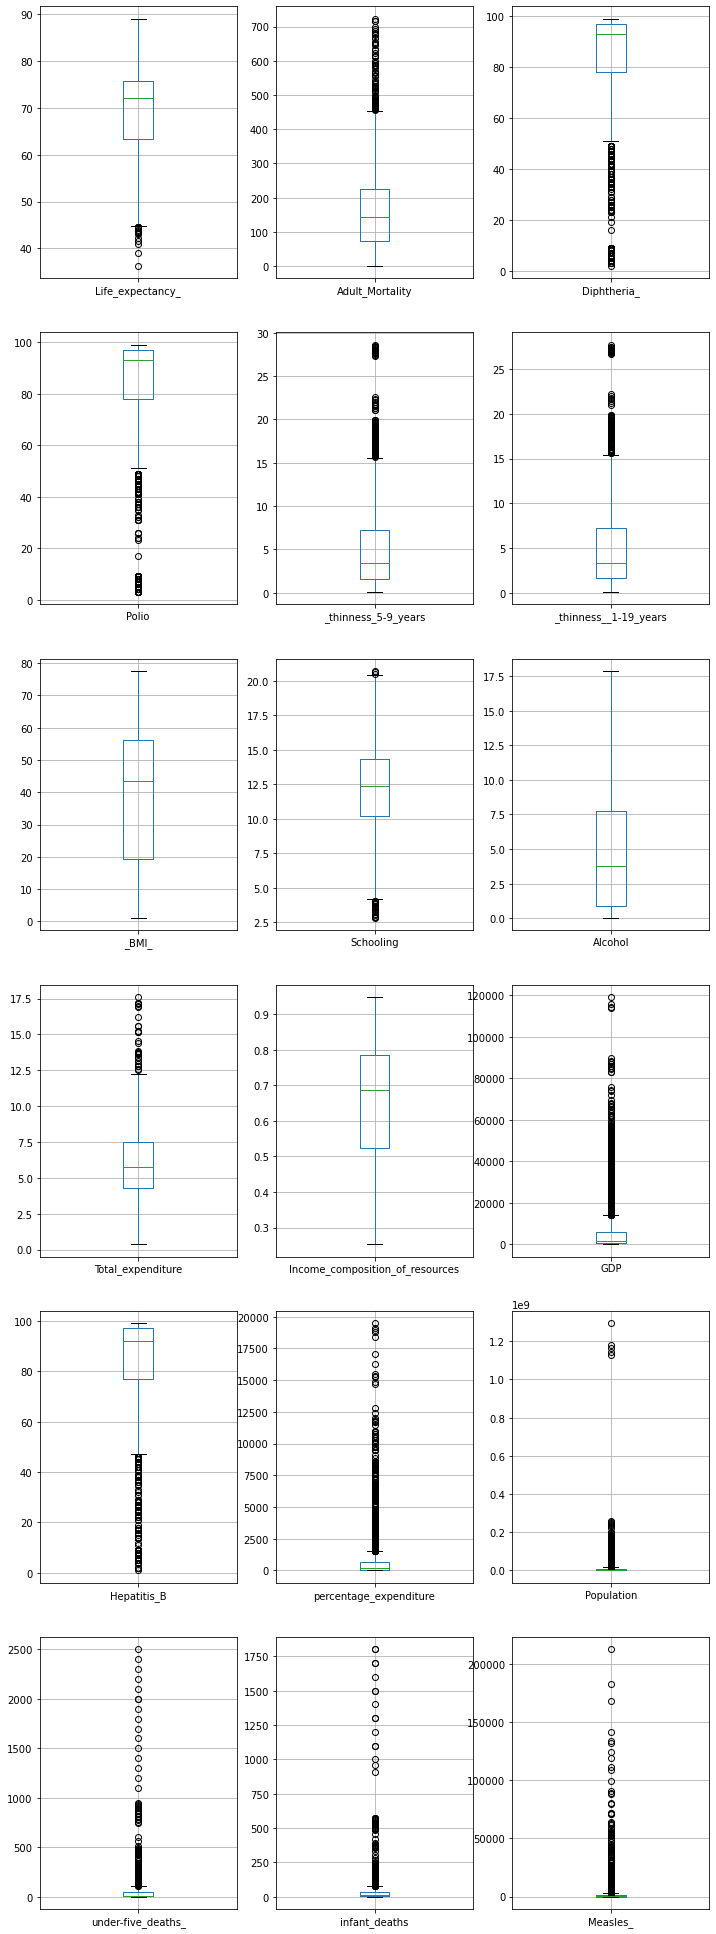

In [46]:
plt.figure(figsize=(12,35))
for i, col in enumerate(['Life_expectancy_', 'Adult_Mortality', 'Diphtheria_', 'Polio', '_thinness_5-9_years', '_thinness__1-19_years', '_BMI_', 'Schooling', 'Alcohol', 'Total_expenditure', 'Income_composition_of_resources', 'GDP', 'Hepatitis_B', 'percentage_expenditure', 'Population', 'under-five_deaths_', 'infant_deaths', 'Measles_'], start=1):
    plt.subplot(6, 3, i)
    df_l2.boxplot(col)

Ящик с усами показывает нам на некоторые аномалии по ряду признаков:

- Adult_Mortality - есть околонулевые значения (заменим на NaN все, что меньше 15-ого процентиля)
- BMI - есть значения меньше 10 и больше 60 (заменим их на NaN)

In [105]:
AD_motral_5 = np.percentile(df_l2['Adult_Mortality'], 20)                          
df_l2['Adult_Mortality'] = df_l2.apply(lambda x: np.nan if x['Adult_Mortality'] < AD_motral_5 else x['Adult_Mortality'], axis=1)                          
df_l2['_BMI_'] = df_l2.apply(lambda x: np.nan if (x['_BMI_'] < 10 or x['_BMI_'] > 60) else x['_BMI_'], axis=1)

Заполним необходимые нам столбцы медианными значениями. При этом медиана будет рассчитываться не от общего количества значений в данной колонке, а с учетом группировки по конкретной стране.

In [106]:
for col in df_l2.columns:
    missing = df_l2[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        df_l2[col] = df_l2.groupby(['Country'], sort=False)[col].apply(lambda x: x.fillna(x.median()))

In [62]:
NaN_dataplot(df_l2)

DF содержит 6.12 % пропущенных значений

_thinness__1-19_years               16
_thinness_5-9_years                 16
Total_expenditure                   32
Hepatitis_B                        144
_BMI_                              144
Income_composition_of_resources    160
Schooling                          160
Measles_                           320
GDP                                400
percentage_expenditure             416
Population                         640
under-five_deaths_                 720
infant_deaths                      752
dtype: int64

Пропущенно по строкам

0    1616
3     432
2     320
1     192
4     112
6     112
5     112
7      16
dtype: int64


In [203]:
# AD_motral_51 = df_l2.groupby(['Country'])['Adult_Mortality'].transform('mean')

In [63]:
AD_motral_5

62.200000000000045

In [76]:
df_l2.query('Country == "Serbia"')

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
2265,Serbia,2015,Developing,75.6,121.0,1.0,9.16,503.111595,94.0,383.0,...,95.0,8.13,95.0,0.1,5237.255334,795383.0,2.0,2.0,0.775,14.4
2266,Serbia,2014,Developing,75.4,123.0,1.0,9.09,8.617208,92.0,37.0,...,93.0,1.37,93.0,0.1,62.173221,713576.0,2.1,2.1,0.771,14.3
2267,Serbia,2013,Developing,75.3,122.0,1.0,9.16,880.640337,91.0,1.0,...,97.0,1.12,95.0,0.1,6353.826383,7164132.0,2.1,2.1,0.766,14.1
2268,Serbia,2012,Developing,74.9,126.0,1.0,9.38,742.510971,97.0,20.0,...,93.0,9.89,91.0,0.1,5659.382400,719977.0,2.1,2.1,0.767,14.0
2269,Serbia,2011,Developing,74.6,127.0,1.0,9.56,915.319079,94.0,370.0,...,94.0,9.72,94.0,0.1,6423.291783,723499.0,2.2,2.2,0.757,13.5
2270,Serbia,2010,Developing,74.4,128.0,1.0,9.65,774.439662,89.0,20.0,...,91.0,1.90,91.0,0.1,5411.877440,7291436.0,2.2,2.3,0.755,13.6
2271,Serbia,2009,Developing,74.1,131.0,1.0,9.85,820.810910,93.0,1.0,...,97.0,9.90,95.0,0.1,5821.353970,73287.0,2.3,2.3,0.754,13.6
2272,Serbia,2008,Developing,74.0,132.0,1.0,9.54,96.332379,93.0,2.0,...,95.0,1.50,95.0,0.1,671.773913,735222.0,2.3,2.4,0.749,13.5
2273,Serbia,2007,Developing,73.8,132.0,1.0,9.30,772.870035,99.0,201.0,...,93.0,1.20,94.0,0.1,5458.121718,7381579.0,2.4,2.4,0.743,13.5
2274,Serbia,2006,Developing,73.6,133.0,1.0,8.58,541.824347,93.0,2.0,...,97.0,8.99,92.0,0.1,4129.758741,7411569.0,2.5,2.5,0.739,13.4


К сожалению, эффективно использовать по всем столбцам "простые" методы заполнения, что были описаны нами выше, - не получится. Некоторые страны имеют сплошные пропуски по целому ряду признаков. Логичным представляется поиск в открытом доступе и заполнение более-менее точными данными тех признаков, которые имеют заметое и высокое влияния на продолжительность жизни. Безусловно, чем меньше пропусков и ошибочным данных в нашем датасете, тем точнее будет модель.

Вариант с объединением стран по регионам тоже не работает: наиболее яркий пример это Гаити и Доминиканская республика, в которых принципиально разный уровень жизни несмотря на общую границу.

Можно написать функцию, которая будет принимать на вход 4 параметра: **Страну, Год, Признак, Значение признака**. И заполнить датасет недостающими значениями вручную. Это не самый оптимальный варианты ввиду его трудозатратности. Проще подготовить отдельный файл с недостающими данными и объединить таблицы.

В данном случае мы все-таки изучаем, как работает линейная регрессия, поэтому не будем заморачиваться с подготовкой данных и заполним пропуски через интерполяцию.

In [21]:
def input_val(country, year, col, data):
    '''Данная функция позволяет заполнить вручную пропущенные данные.
       Она принимает  на вход 4 параметра: Страну, Год, Признак, Значение признака'''
    df_l2.loc[(df_l2['Country'] == country) & (df_l2['Year'] == year), col] = data

In [22]:
input_val('Somalia', 2013, 'GDP', 376)

In [107]:
df_l3 = df_l2.interpolate(method = 'linear', limit_direction = 'forward')

In [108]:
NaN_dataplot(df_l3)

DF содержит 0.0 % пропущенных значений

Series([], dtype: int64)

Пропущенно по строкам

0    2912
dtype: int64


### Модель линейной регрессии

Предварительно взглянем, как изменилась теснота связей после всех наших манипуляций с данными.

In [109]:
corr_3 = df_l3[df_l3.columns[3:]].corr()['Life_expectancy_']
c = corr_3.to_frame().reset_index()
c.head(20)

,index,Life_expectancy_
0,Life_expectancy_,1.000000
1,Adult_Mortality,-0.907221
2,infant_deaths,-0.107890
3,Alcohol,0.406934
4,percentage_expenditure,0.378436
5,Hepatitis_B,0.271693
6,Measles_,-0.124158
7,_BMI_,0.704869
8,under-five_deaths_,-0.133329
9,Polio,0.464313


In [110]:
df_mb2 = b.merge(c, on = 'index', how = 'left').dropna(axis=0)
df_mb2['Diff, %'] = 100-(df_mb2['Life_expectancy__x'].div(df_mb2['Life_expectancy__y']))*100
df_mb2.head(20)

,index,Life_expectancy__x,Life_expectancy__y,"Diff, %"
0,Life_expectancy_,1.000000,1.000000,0.000000
1,Adult_Mortality,-0.696359,-0.907221,23.242633
2,infant_deaths,-0.151548,-0.107890,-40.464936
3,Alcohol,0.404877,0.406934,0.505598
4,percentage_expenditure,0.427902,0.378436,-13.070933
5,Hepatitis_B,0.256762,0.271693,5.495503
6,Measles_,-0.147950,-0.124158,-19.162514
7,_BMI_,0.567694,0.704869,19.461154
8,under-five_deaths_,-0.185136,-0.133329,-38.856303
9,Polio,0.465556,0.464313,-0.267714


Посмотрим на распределение данных по продолжительности жизни

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


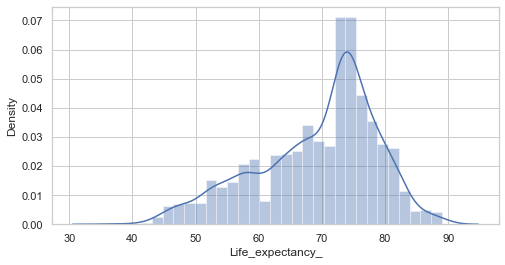

In [85]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (8, 4))
ax = sns.distplot(df_l3['Life_expectancy_'], kde = True)

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [111]:
y = df_l3['Life_expectancy_']
X = df_l3.drop(['Life_expectancy_', 'Country', 'Year', 'Status'], axis=1)

Разделим данные на обучающие и тестовые наборы. Тестовый набор сделаем 20% от общего.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Модель линейной регрессии должна была найти наилучшие значения для смещения и углового коэффициента, которые будут соответствовать линии, которая лучше всего соответствует нашим данным.

In [124]:
print('Intercept: {:.2f}'.format(model.intercept_))
print('Slope: {:.2f}'.format(model.coef_[0]))

Intercept: 61.83
Slope: -0.05


In [125]:
y_predict = model.predict(X_test)

In [126]:
df_reg = pd.DataFrame({'Наблюдаемые': y_test, 'Предсказанные': y_predict})
df_reg['Остаток'] = y_test - y_predict
df_reg.head(10)

,Наблюдаемые,Предсказанные,Остаток
987,73.9,74.651320,-0.751320
1170,82.7,81.008872,1.691128
1501,54.0,55.705538,-1.705538
1684,76.6,75.451520,1.148480
1906,47.7,50.349877,-2.649877
2163,52.0,58.345829,-6.345829
2271,74.1,76.175392,-2.075392
2773,78.8,78.867491,-0.067491
89,75.2,76.326200,-1.126200
2469,59.6,59.986560,-0.386560


Попробуем оценить, насколько точна наша модель. Для оценки "силы" предсказания используем коэффициент детерминации и корень из среднеквадратичной ошибки.

Коэф.детерминации показывает, сколько процентов вариации зависимой переменной объясняется независимой переменной. Т.е., он показывает объясняющую способность построенной модели. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть не меньше 50%.

Корень из среднеквадратичной ошибки - это метрика, которая сообщает нам среднее расстояние между прогнозируемыми значениями из модели и фактическими значениями в наборе данных. Соответственно, чем больше значение RSME, те дальше предсказанное значение от наблюдаемого.

In [127]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_predict)
RSME = mean_squared_error(y_test, y_predict, squared=False)

print('Коэффициент детерминации:  {:.2f}'.format(r2))
print('RSME: {:.2f}'.format(RSME))

Коэффициент детерминации:  0.91
RSME: 2.83


[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

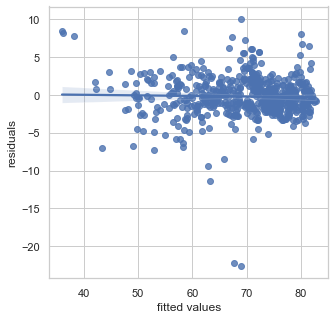

In [128]:
fig, ax = plt.subplots(figsize =(5,5))
sns.regplot(x = y_predict, y = y_test-y_predict, ax = ax)
ax.set(ylabel = 'residuals', xlabel = 'fitted values')